# First Classification: Logistic Regression from Linear Regression

## How is it used?

### Linear Regression

Trying to find the **relationship**

### Classification

Really more of a "yes" or "no"

> _"You're either with us, or against us"_

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

## Classification: Use Logistic Regression

Probability of belonging to a particular group

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

In [1]:
!pip install fsds_100719
from fsds_100719.imports import *
import fsds_100719 as fs

Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import sklearn.metrics as metrics
import sklearn.metrics as met

# import some data to play with
from sklearn import datasets

# For our modeling steps
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Play with some data

In [3]:
heart_csv='https://raw.githubusercontent.com/learn-co-students/dsc-roc-curves-and-auc-online-ds-ft-100719/master/heart.csv'
df = pd.read_csv(heart_csv)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


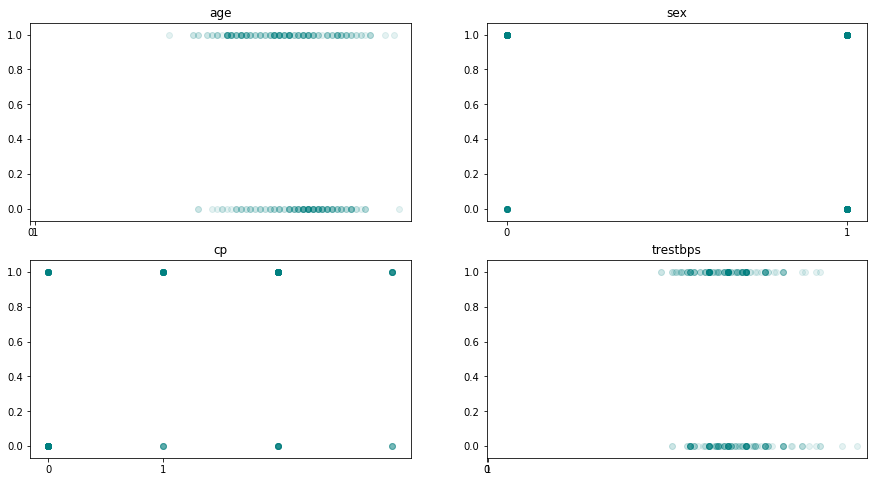

In [4]:
import matplotlib.pyplot as plt

# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter( df.iloc[:,i],df['target'], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

In [5]:
# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape,X_test.shape, y_test.shape

((227, 13), (76, 13), (76,))

We can go ahead and explore some graphs to show that it doesn't make sense to do a linear regression


In [6]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
# print("")
df.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Confusion matrix, without normalization
[[24  9]
 [ 5 38]]


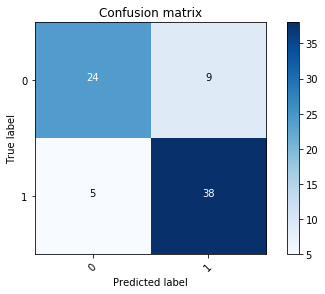

NameError: name 'y_score' is not defined

In [7]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
# y_score = logreg.fit(X_train, y_train).decision_function(X_test)
cm = metrics.confusion_matrix(y_test,y_hat_test)
fs.jmi.plot_confusion_matrix(cm,classes=list(range(len(cm))))
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

In [ ]:
# import math
# df.plot(kind='scatter',x='age',y='target')
# def sigmoid(x):
#     x = np.array(x)
#     return 1/(1 + np.e**(-1*x))

# x_sig = sigmoid(df['age'])
# plt.plot(x=['age'],y= x_sig)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluating Classifications

## Confusion Matrices

[Metrics & Confusion Matrices](../../EvaluatingModels/evaluation_metrics.ipynb)

In [ ]:
fs.ihelp(fs.jmi.plot_confusion_matrix,0)

In [ ]:
## make a plotting function
# cm = metrics.confusion_matrix(y_test,y_hat_test)

def plot_confusion_matrix():
    pass

## ROC & AUC

[ROC Curve & AUC for Evaluation](../../EvaluatingModels/evaluation_curves.ipynb)

In [ ]:
# # Define appropriate X and y
# y = dfh['target']
# X = dfh.drop(columns='target', axis=1)

# # Normalize the Data
# X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# # Split the data into train and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# X_train.shape,X_test.shape, y_test.shape

In [ ]:
# # Fit a model
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
# logreg.fit(X_train, y_train)
# print(logreg) # Preview model params

# # Predict
# y_hat_test = logreg.predict(X_test)

# # Data preview
# print("")
# dfh.head()

In [ ]:
# from sklearn.metrics import roc_curve, auc

# # Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# # for various decision boundaries given the case member probabilites

# # First calculate the probability scores of each of the datapoints:
# y_score = logreg.fit(X_train, y_train).decision_function(X_test)
# cm = metrics.confusion_matrix(y_test,y_hat_test)
# fs.jmi.plot_confusion_matrix(cm,classes=list(range(len(cm))))
# fpr, tpr, thresholds = roc_curve(y_test, y_score)
# print('AUC: {}'.format(auc(fpr, tpr)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# import bs_ds as bs

In [ ]:
fs.ihelp(bs.capstone.evaluate_classification_model,0)